In [3]:
# need to run in the sims kernel - where I have msprime/demes installed

#import msprime
import demes
import demesdraw
import matplotlib.pyplot as plt

%matplotlib inline 

dem_yaml_path = "helper_files/demo_params/archaic_admix.yaml"

<AxesSubplot:ylabel='time ago (generations)'>

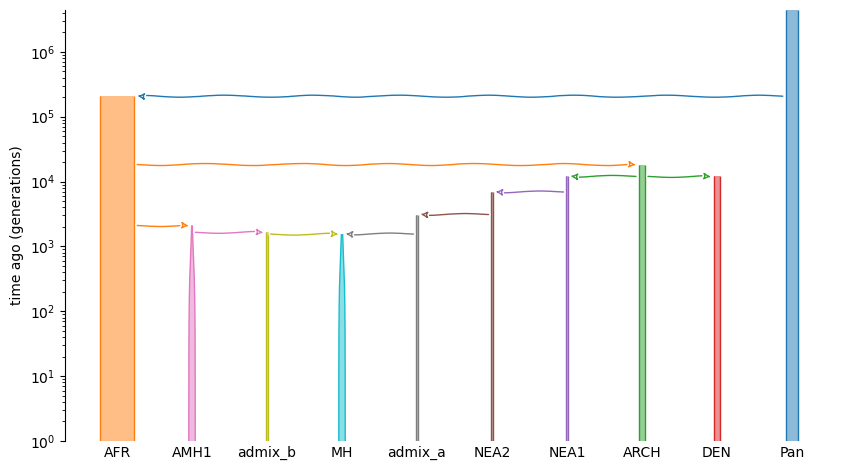

In [4]:
# load the deme
graph = demes.load(dem_yaml_path)

# print the graph
demesdraw.tubes(graph, log_time=True)



In [14]:
# simulate 10 independent chromosomes, each with a length of 2e7
# this is faster, and also creates independent chromosomes that we could use to validate tests

# include european and chimpanzee populations in my simulation
seed_simu=11
gen_time = 26
n_samps = 10
demo = msprime.Demography.from_demes(graph)

# simulate the 3 known high-coverage Neanderthal and Denisovan samples
# african and european populations (5 individuals)
# 7 different test neanderthal populations (3 individuals each)
for i in range(3):
    print(i)
    seed_simu += 1
    print(seed_simu)
    sim_admixed_indiv = msprime.sim_ancestry(samples=[
                                                msprime.SampleSet(num_samples = n_samps, population="p_4", time=4210, ploidy=2),
                                                msprime.SampleSet(num_samples = n_samps, population="p_4", time=2000, ploidy=2),
                                                msprime.SampleSet(num_samples = n_samps, population="p_7", time=4210, ploidy=2),
                                                msprime.SampleSet(num_samples = n_samps, population="p_10", time=4210, ploidy=2),
                                                msprime.SampleSet(num_samples = n_samps, population="p_10", time=0, ploidy=2),
                                                ],
                                                
                                                demography=demo,sequence_length=50000000, recombination_rate=1e-8,random_seed=seed_simu)
    print("simulations done")
    sim_admixed_indiv = msprime.sim_mutations(sim_admixed_indiv, rate=1.5e-8, random_seed=seed_simu)

    # create names and write out vcf:
    pop_counts = {"p_4_st4210":10, "p_4_st2000":10, "p_7_st4210":10, "p_10_st4210":10, "p_10_st0":10} 
    # for output
    indiv_names = []
    for pop in pop_counts.keys():
        for j in range(pop_counts[pop]):
            indiv_names.append(pop + '_' + str(j + 1))

    with open(f'/global/scratch/users/sarahj32/sim-fstats/test_qpdstat/new_sim_{i}.vcf', "w") as vcf_file:
        sim_admixed_indiv.write_vcf(vcf_file, individual_names = indiv_names, contig_id = i+1)



0
12
simulations done
1
13
simulations done
2
14
simulations done
